## 1. Importar librerías, definir paths y otras definiciones

#### Variables de entorno

In [1]:
FILTER_STOP_WORDS = True
FILTER_BY_LENGTH = True
MIN_LENGTH = 30.0 #min
NORMALIZE_MATRIX_BY_LENGTH = True

#### Libererías

In [2]:
import warnings
warnings.filterwarnings("ignore")

C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\nbconvert\exporters\exporter_locator.py:28: DeprecationWarning: `nbconvert.exporters.exporter_locator` is deprecated in favor of `nbconvert.exporters.base` since nbconvert 5.0.
  DeprecationWarning)
C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\nbconvert\preprocessors\regexremove.py:41: DeprecationWarning: Traits should be given as instances, not types (for example, `Int()`, not `Int`). Passing types is deprecated in traitlets 4.1.
  patterns = List(Unicode, default_value=[r'\Z']).tag(config=True)
C:\Users\CATALINA ESPINOZA\AppData\Local\conda\conda\envs\env27\lib\site-packages\traitlets\traitlets.py:2367: DeprecationWarning: Traits should be given as instances, not types (for example, `Int()`, not `Int`). Passing types is deprecated in traitlets 4.1.
  super(Set, self).__init__(trait, default_value, minlen, maxlen, **kwargs)
C:\Users\CATALINA ESPINOZA\AppData\Local\con


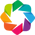


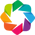

In [3]:
%matplotlib inline
from __future__ import division
import string
import math
import os
import nltk
import json
import unidecode
import matplotlib
import matplotlib.pyplot as plt, mpld3
import matplotlib.pylab as pylab
import numpy as np
import holoviews as hv
hv.extension('bokeh')
import pandas as pd
from scipy import stats
from text_clustering import text_preprocessing as tp, word_connection_matrix as wcm,viz

#### Paths

In [4]:
root_path = 'C:\Users\CATALINA ESPINOZA\Documents\clusters ciae'
data_path = os.path.join(root_path,'data')
output_path = os.path.join(root_path,'output')
pickle_path = os.path.join(output_path,'pickles')
by_grade_path = os.path.join(output_path,'textos_ulloa_by_curso')
by_grade_and_content = os.path.join(data_path,'textos_ulloa_by_grade_content')
by_content_path = os.path.join(output_path,'textos_ulloa_by_contenido')
all_files_path = os.path.join(data_path,'textos_ulloa')
all_classes = os.path.join(data_path,'clases_ulloa.txt')

#### Funciones

In [5]:
def to_tuple(matrix):
    a_tuple_list = []
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            a_tuple_list.append((i,j,matrix[i,j]))
    return a_tuple_list

#### Recover data

In [6]:
import pickle
with open(os.path.join(pickle_path,'document_length_dict.pickle'),'rb') as f:
    document_length = pickle.load(f)

In [7]:
dict_by_grade_and_content = tp.get_dict_files_with_grade_and_content(by_grade_and_content)

In [24]:
document_labels = tp.get_labels_by_document(names_matrices,dict_by_grade_and_content)

In [9]:
all_documents_dict = tp.read_documents(all_files_path)

In [10]:
document_length_filtered = {}
if FILTER_BY_LENGTH:
    filtered_documents = {}
    for document in all_documents_dict.keys():
        if document_length[document]>= MIN_LENGTH:
            document_length_filtered[document] = document_length[document]
            filtered_documents[document] = all_documents_dict[document]
    all_documents_dict = filtered_documents

## 2. Leer tópicos desde archivo

In [11]:
topic_names = []
topic_words = []
topic_score = []
with open(os.path.join(data_path,'200_clusters.csv'), 'r') as f:
    first = True
    for line in f:
        if first:
            aux_list = line.split(';;')
            topic_names = map(lambda x: x.split(' ')[1],aux_list)
            first = False
        else:
            splited_line = line.split(';')
            topic_words.append(splited_line[::2])
            topic_score.append(splited_line[1::2])
n_topics = len(topic_names)
print n_topics

200


In [12]:
topic_words = np.matrix(topic_words).transpose().tolist()
topic_score = np.matrix(topic_score).transpose().tolist()

## 3. Crear diccionario de palabras con tópicos asociados

hacer diccionario de palabras y topicos a los que pertenece (sin score

In [13]:
dict_topic_words = dict(zip(topic_names,topic_words))

In [14]:
flat_list = [item for sublist in topic_words for item in sublist]

In [15]:
set_of_topic_words = list(set(flat_list))

In [16]:
len(set_of_topic_words)

2820

In [17]:
dict_words_topics = {}
dict_words_topics_index = {}
for word in set_of_topic_words:
    dict_words_topics[word] = []
    dict_words_topics_index[word] = []
    for t in range(len(topic_words)):
        if word in topic_words[t]:
            dict_words_topics[word].append(topic_names[t])
            dict_words_topics_index[word].append(t)            

## 4. Crear matriz de frecuencia de conectividad entre tópicos por clase

sin pertenencia, relaciones entre topicos

In [18]:
matrices_list,names_matrices = wcm.get_topic_matrices(all_documents_dict,dict_words_topics_index,n_topics)
print(len(matrices_list))

51


In [19]:
matrices_list[0].shape

(200L, 200L)

In [20]:
import datetime
datetime.datetime.now().time()

datetime.time(16, 8, 1, 394000)

In [21]:
wcm.check_symmetric(matrices_list[0]*matrices_list[0])

False

In [22]:
#norm_matrices_list = wcm.normalize_matrices(matrices_list,document_length)

In [23]:
norm_array_list = map(lambda x: np.ravel(x),wcm.normalize_matrices(matrices_list,document_length_filtered))
#norm_array_list = map(lambda x: np.ravel(x),norm_matrices_list)
#array_list = map(lambda x: np.ravel(x),matrices_list)

## 5. Clustering de matrices

In [25]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt, mpld3
mpld3.enable_notebook()
import matplotlib.pylab as pylab

(array([36.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

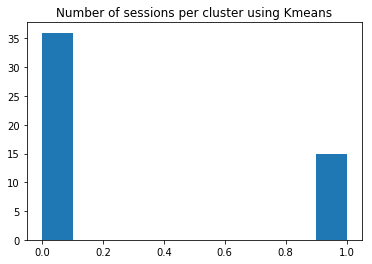

In [37]:
centers_kmeans,labels_kmeans = wcm.get_kmeans_clusters(norm_array_list,2)
plt.title("Number of sessions per cluster using Kmeans")
plt.hist(labels_kmeans)

Text(0.5,1,u'Number of sessions per cluster using SVM')

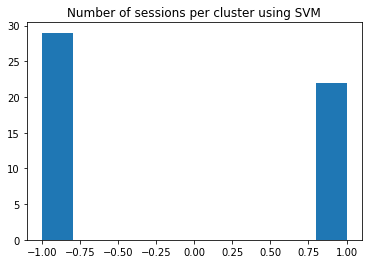

In [29]:
centers_svm,labels_svm = wcm.get_svm_clusters(norm_array_list)
plt.hist(labels_svm)
plt.title("Number of sessions per cluster using SVM")


## 6. Graficar matrices

In [30]:
kmeans_axis = centers_kmeans[1] - centers_kmeans[0]
svm_axis = centers_svm[1] - centers_svm[0]
kmeans_indicator_matrices = map(lambda x: np.dot(x,kmeans_axis),norm_array_list) 
svm_indicator_matrices = map(lambda x: np.dot(x,svm_axis),norm_array_list)

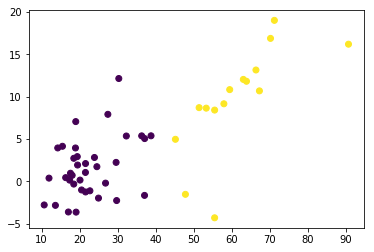

In [31]:
plt.scatter(kmeans_indicator_matrices,svm_indicator_matrices,c=labels_kmeans)

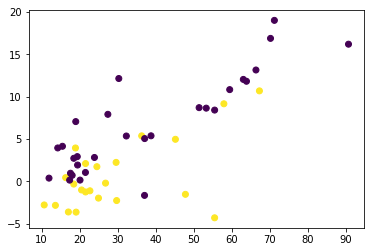

In [32]:
plt.scatter(kmeans_indicator_matrices,svm_indicator_matrices,c=labels_svm)

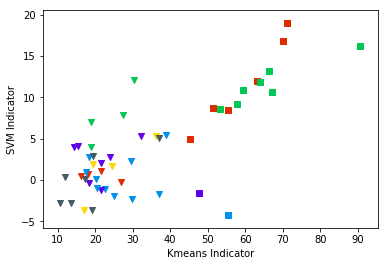

In [35]:
viz.scatter_plot_by_grade_by_cluster(kmeans_indicator_matrices,svm_indicator_matrices,labels_kmeans,'Kmeans Indicator','SVM Indicator',names_matrices,document_labels)

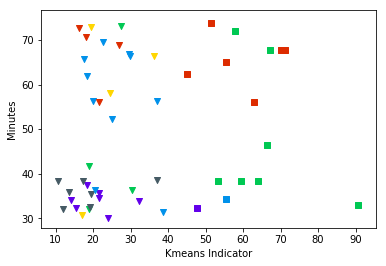

In [34]:
documents_length_audio = []
for i in range(len(kmeans_indicator_matrices)):
    name = names_matrices[i]
    documents_length_audio.append(document_length_filtered[name])
viz.scatter_plot_by_grade_by_cluster(kmeans_indicator_matrices,documents_length_audio,labels_kmeans,'Kmeans Indicator','Minutes',names_matrices,document_labels,None)

Filter documents

## 7. Obtener matriz con indicador KS entre las matrices de los dos clusters

In [36]:
from text_clustering import viz

In [40]:
ks_matrix,w_ij_cluster0,w_ij_cluster1 = viz.get_ks_matrix(labels_kmeans,norm_array_list,topic_names)

In [41]:
%%opts HeatMap [tools=['hover'] colorbar=True width=1000 height=1000 toolbar='above']
heatmap = viz.ks_heatmap(ks_matrix,w_ij_cluster0,w_ij_cluster1,topic_names)
heatmap

:HeatMap   [x,y]   (KS,freq_in_documents_and_by_minute_cluster_0,freq_in_documents_and_by_minute_cluster_1)

In [42]:
set_all = topic_names
list_ks_sorted = np.argsort(np.ravel(ks_matrix))
sorted_pair_ij = wcm.get_word_pairs(list_ks_sorted,len(ks_matrix),len(set_all))
zipped_pair_ij = zip(sorted_pair_ij[0],sorted_pair_ij[1])
flipped = np.flip(sorted_pair_ij,0)
for i in range(len(flipped)):
    if i <20:
        print str(i)+") "+set_all[flipped[i][0]]+"->"+set_all[flipped[i][1]]+", ks: "+str(ks_matrix[flipped[i][0],flipped[i][1]])

0) industria->electricidad, ks: 0.9722222222222222
1) explicar->electricidad, ks: 0.9444444444444444
2) aritmetica->electricidad, ks: 0.9444444444444444
3) electricidad->aritmetica, ks: 0.9166666666666666
4) aritmetica->calcular, ks: 0.9055555555555556
5) numeros->electricidad, ks: 0.9055555555555556
6) geometria->electricidad, ks: 0.8888888888888888
7) musculos->electricidad, ks: 0.8777777777777778
8) fisica->electricidad, ks: 0.8777777777777778
9) contar->electricidad, ks: 0.8666666666666667
10) calcular->electricidad, ks: 0.8611111111111112
11) fisica->aritmetica, ks: 0.85
12) calcular->fisica, ks: 0.85
13) aritmetica->trabajo, ks: 0.8388888888888889
14) responder->electricidad, ks: 0.8333333333333334
15) responder->fisica, ks: 0.8111111111111111
16) electricidad->fisica, ks: 0.8111111111111111
17) patrones->electricidad, ks: 0.8111111111111111
18) ?->electricidad, ks: 0.8111111111111111
19) electricidad->tablas, ks: 0.8111111111111111


In [43]:
topic_names.index('metodo')

23

In [44]:
topic_words[128]

['coordena',
 'cmDIGITD',
 'mar\xc3\xada',
 'diagonal',
 'ana',
 'andr\xc3\xa9s',
 'original',
 'diego',
 'piso',
 'asistent',
 'ra\xc3\xbal',
 'aquel',
 'coordina',
 'santilla',
 'juan',
 's',
 'natalia',
 'ver\xc3\xb3nica',
 'rodr\xc3\xadgue',
 'santiago']

### KS matrix by filtered topics

In [45]:
reload(wcm)

<module 'text_clustering.word_connection_matrix' from 'text_clustering\word_connection_matrix.pyc'>

In [46]:
selected_topics = ['vectores','problemas','ordenar','metodo','explicar','tablas','trabajo','ciencia','aprender','representar','responder','electricidad','hacer','operar','gases','evaluar','medio','atmosfera','esquema','ejercitar','atomo','agua','aire','energia','algebra','fisica','experimentar','razonar','astronomia','cinematica']

In [47]:
selected_words = []
selected_topics_names = []
for topic_index,topic in enumerate(topic_names):
    if topic in selected_topics:
        selected_words.append(filter(lambda x: True if len(x)>2 else False,topic_words[topic_index]))
        selected_topics_names.append(topic)

In [48]:
flat_list = [item for sublist in selected_words for item in sublist]
set_of_selected_topic_words = list(set(flat_list))
len(set_of_selected_topic_words)

710

In [49]:
dict_words_topics_filtered = {}
dict_words_topics_index_filtered = {}
for word in set_of_selected_topic_words:
    dict_words_topics_filtered[word] = []
    dict_words_topics_index_filtered[word] = []
    for t in range(len(selected_words)):
        if word in selected_words[t]:
            dict_words_topics_filtered[word].append(selected_topics_names[t])
            dict_words_topics_index_filtered[word].append(t)            

In [50]:
n_topics = len(selected_topics_names)
n_topics

48

In [51]:
matrices_list,names_matrices = wcm.get_topic_matrices(all_documents_dict,dict_words_topics_index_filtered,n_topics)
print(len(matrices_list))

51


In [52]:
len(document_length_filtered)

51

In [53]:
matrices_list[0].shape

(48L, 48L)

In [54]:
for i in range(len(selected_topics_names)):
    selected_topics_names[i] = selected_topics_names[i]+'_'+str(i)

In [55]:
len(selected_topics_names)

48

In [56]:
%%opts HeatMap [tools=['hover'] colorbar=True width=1000 height=1000 toolbar='above']
is_1 = lambda x : 1 if x>0 else 0
freq_matrix = sum(matrices_list)
df = pd.DataFrame(freq_matrix)
df.columns = map(lambda x: x.replace(" ",""),selected_topics_names)
#df.index =  map(lambda x: x.replace(" ",""),selected_topics_names)
count_pair_c0 = map(lambda x: sum(map(is_1,x)),w_ij_cluster0)
count_pair_c1 = map(lambda x: sum(map(is_1,x)),w_ij_cluster1)
freq_pair_c0 = map(lambda x: sum(x),w_ij_cluster0)
freq_pair_c1 = map(lambda x: sum(x),w_ij_cluster1)

heatmap = hv.HeatMap(wcm.to_tuple(df,count_pair_c0,count_pair_c1,freq_pair_c0,freq_pair_c1),vdims=['pair frequency','freq_in_documents_and_by_minute_cluster_0','freq_in_documents_and_by_minute_cluster_1'])
heatmap

:HeatMap   [x,y]   (pair frequency,freq_in_documents_and_by_minute_cluster_0,freq_in_documents_and_by_minute_cluster_1)

In [57]:
n_kmeans = 2
clusters_max = [0,1]
# filtrar documentos con palabras
if NORMALIZE_MATRIX_BY_LENGTH:
    norm_matrices_list = wcm.normalize_matrices(matrices_list,document_length_filtered)
else:
    norm_matrices_list = matrices_list
norm_array_list = map(lambda x: np.ravel(x),norm_matrices_list)
# sacar otros indicadores
centers_kmeans,labels_kmeans_topics = wcm.get_kmeans_clusters(norm_array_list,n_kmeans)
kmeans_axis = centers_kmeans[clusters_max[0]] - centers_kmeans[clusters_max[1]]
topics_indicator = map(lambda x: np.dot(x,kmeans_axis),norm_array_list) 

In [58]:
document_labels = tp.get_labels_by_document(names_matrices,dict_by_grade_and_content)

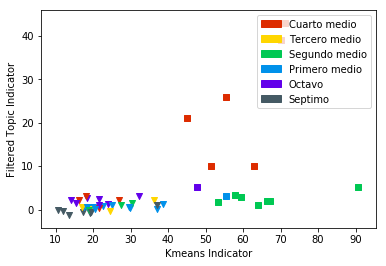

In [59]:
viz.scatter_plot_by_grade_by_cluster(kmeans_indicator_matrices,topics_indicator,labels_kmeans,'Kmeans Indicator','Filtered Topic Indicator',names_matrices,document_labels,'upper right')

In [60]:
len(norm_array_list[0])

2304

In [61]:
%%opts HeatMap [tools=['hover'] colorbar=True width=1000 height=1000 toolbar='above']
ks_matrix,w_ij_cluster0,w_ij_cluster1 = viz.get_ks_matrix(labels_kmeans,norm_array_list,selected_topics_names)
heatmap = viz.ks_heatmap(ks_matrix,w_ij_cluster0,w_ij_cluster1,selected_topics_names)
heatmap

:HeatMap   [x,y]   (KS,freq_in_documents_and_by_minute_cluster_0,freq_in_documents_and_by_minute_cluster_1)

In [62]:
%%opts HeatMap [tools=['hover'] colorbar=True width=1000 height=1000 toolbar='above']
ks_matrix,w_ij_cluster0,w_ij_cluster1 = viz.get_ks_matrix(labels_kmeans,norm_array_list,selected_topics_names)
heatmap = viz.ks_heatmap(ks_matrix,w_ij_cluster0,w_ij_cluster1,selected_topics_names)
heatmap

:HeatMap   [x,y]   (KS,freq_in_documents_and_by_minute_cluster_0,freq_in_documents_and_by_minute_cluster_1)

In [63]:
list_ks_sorted = np.argsort(np.ravel(ks_matrix))
sorted_pair_ij = wcm.get_word_pairs(list_ks_sorted,len(ks_matrix),len(set_all))
zipped_pair_ij = zip(sorted_pair_ij[0],sorted_pair_ij[1])
flipped = np.flip(sorted_pair_ij,0)
for i in range(len(flipped)):
    if i <20:
        print str(i)+") "+set_all[flipped[i][0]]+"->"+set_all[flipped[i][1]]+", ks: "+str(ks_matrix[flipped[i][0],flipped[i][1]])

IndexError: index 101 is out of bounds for axis 1 with size 48